## Linear regression one variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'C:/Users/baoth/Desktop/Learnmore/AIM/Week2/ex1/ex1data1.txt'

In [3]:
data = pd.read_csv(url,header=None)

In [4]:
data.columns = ['Population','Profit']

<function matplotlib.pyplot.show(close=None, block=None)>

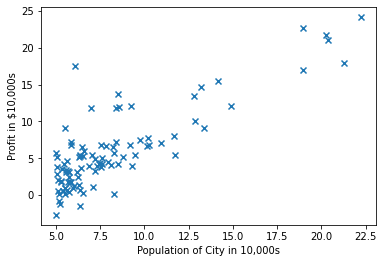

In [49]:
fig =plt.scatter(data['Population'],data['Profit'],marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show


In [42]:
m = len(data)
X = [np.ones(m),data['Population'].values]
y = [data['Profit'].values]
theta = np.zeros(2)
iteration=1500
alpha=0.01

### Compute cost function

In [7]:
def compute_cost(X,y,theta,m):
    error=theta@X - y
    MSE = pow(error,2)
    J = np.sum(MSE)
    J = J/(2*m)
    return J

In [22]:
compute_cost(X,y,theta,m)

32.072733877455676

In [23]:
compute_cost(X,y,np.array([-1,2]),m)

54.24245508201238

### Gradient descent

In [43]:
def gradient_descent(X,y,theta,alpha,iter,m):
    J_history = {}
    for i in range(iter):
        J_dev=(theta@X-y)@np.transpose(X)
        theta = theta-alpha*J_dev/m
        J_history[i]=compute_cost(X,y,theta,m)
    return theta,J_history

In [44]:
theta = gradient_descent(X,y,theta,alpha,iteration,m)

In [67]:
theta[0]

array([[-3.63029144,  1.16636235]])

In [68]:
Y_line = theta[0]@X
Y_line

array([[ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
         6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
         3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
         2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
         3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
        18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
         2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
         5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
         2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
         4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
         5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
         3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
         6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
         4.78874528,  6.04480089,  8.30859358,  2.7

<function matplotlib.pyplot.show(close=None, block=None)>

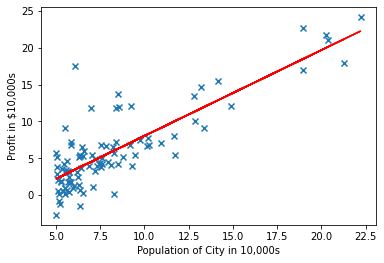

In [74]:
plt.scatter(data['Population'],data['Profit'],marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(data['Population'],np.transpose(Y_line),color='red')
plt.show

In [88]:
predict = theta[0]@[1,10.5]
predict

array([8.61651324])

### Visualize J(0)

In [101]:
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-1,4,100)

In [102]:
J_values = []
for i in theta_0:
    value_j = []
    for j in theta_1:
        theta_val=np.array([i,j])
        value_j.append(compute_cost(X,y,theta_val,m))
    J_values.append(value_j)

In [103]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Surface(z=J_values,
                                x=theta_0,
                                y=theta_1))
# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

fig.show()

### Linear regression multiple vaiables

In [1]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
path = 'https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.to_csv('C:/Users/baoth/Desktop/Learnmore/AIM/Week2/california_housing_train.csv',)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import  StandardScaler

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin

In [10]:
class FeaturesAdder(BaseEstimator,TransformerMixin):
    """ Adds new features in the dataset"""
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X['rooms_per_household']=X['total_rooms']/X['households']
        X['bedrooms_per_room']=X['total_bedrooms']/X['total_rooms']
        X['population_per_household']=X['population']/X['households']
        return X
    
class RemoveOutliers(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X=X[(X['median_house_value']!=500001)|(X['median_income']>=2)].reset_index(drop=True)
        X=X[X['median_income']<=11].reset_index(drop=True)
        X=X[(X['median_house_value']!=350000) |(X['median_income']>=1.5)].reset_index(drop=True)
        X=X[(X['median_house_value']!=450000) | (X['median_income']>=2)].reset_index(drop=True)
        X=X[(X['median_house_value']>=350000) | (X['median_income']<=9.5)].reset_index(drop=True)
        X=X[X['population']<=9000]
        X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        X=X[X['rooms_per_household']<20]
        X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p
        X['total_rooms']=X['total_rooms'].apply(lambda x: boxcox1p(x,0.25))
        X['total_bedrooms']=X['total_bedrooms'].apply(lambda x: boxcox1p(x,0.25))
        X['households']=X['households'].apply(lambda x: boxcox1p(x,0.2))
        X['population']=X['population'].apply(lambda x: boxcox1p(x,0.3))
        X['rooms_per_household']=X['rooms_per_household'].apply(lambda x: np.log1p(x)**0.5)
        X['bedrooms_per_room']=X['bedrooms_per_room'].apply(lambda x: np.log1p(x)**0.25)
        X['median_income']=X['median_income'].apply(lambda x: np.log1p(x)**1.25)
        X['population_per_household']=X['population_per_household'].apply(lambda x: np.log1p(x)**1)
        return X
class DataFrameSelector(BaseEstimator,TransformerMixin):
    """This class is a dataframe selector.
        Data members:
            features: A list of column_names you want in output dataframe
    """
    def __init__(self,features):
        self.features=features
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.features]
class GetDummies(BaseEstimator,TransformerMixin):
    """This class is used to get dummy columns from categorical columns."""
    def fit (self,X,y=None):
        return self
    def transform(self,X,y=None):
        #change ISLAND to NEAR BAY...as count of ISLAND is very low
        X[X=='ISLAND']='NEAR BAY'
        return (pd.get_dummies(X,drop_first=True))

In [11]:
df = FeaturesAdder().fit_transform(df)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [13]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [14]:
df = RemoveOutliers().fit_transform(df)

In [15]:
data_labels = df['median_house_value']
df = df.drop('median_house_value',axis=1)

In [16]:
df = FeaturesTransformer().fit_transform(df)

In [17]:
num_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household','bedrooms_per_room', 'population_per_household']
cat_featues=['ocean_proximity']

In [18]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_features)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [19]:
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_featues)),
    ('get_dummies',GetDummies())
])

In [20]:
data_cleaning_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),  
])

In [21]:
df = data_cleaning_pipeline.fit_transform(df)

<ipython-input-10-3a46e3927f61>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X=='ISLAND']='NEAR BAY'
C:\Users\baoth\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [22]:
def remove_by_pvalue(X,y,pvalue=0.05):
    import statsmodels.api as sm
    for i in range(len(X.columns)):
        regressor_OLS=sm.OLS(endog=y,exog=X).fit()
        s = regressor_OLS.pvalues.sort_values(ascending=False)
        if s.iloc[0] >pvalue:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],'P-value: ',s.iloc[0])

def remove_by_vif(X,vif=5):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [23]:
l = num_features.copy()
l.extend([0,1,2])
df=pd.DataFrame(df,columns=l)

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,0,1,2
0,-1.323510,1.050749,0.985733,-1.203722,-1.613220,-1.649015,-1.611451,2.191852,1.234791,-1.444209,-0.435564,0.0,1.0,0.0
1,-1.318527,1.041394,-0.611604,1.988849,1.489239,1.134532,1.657931,2.183623,0.777806,-1.195761,-1.178564,0.0,1.0,0.0
2,-1.328493,1.036717,1.864269,-0.569041,-1.170958,-1.183720,-1.196806,1.802896,1.918922,-1.941405,-0.063429,0.0,1.0,0.0
3,-1.333476,1.036717,1.864269,-0.752420,-0.909020,-1.045992,-0.921949,1.121195,0.493196,-0.493741,-0.447450,0.0,1.0,0.0
4,-1.333476,1.036717,1.864269,-0.430281,-0.682261,-1.031126,-0.696841,0.167662,0.806181,-0.784431,-1.052249,0.0,1.0,0.0


In [25]:
remove_by_vif(df)
remove_by_pvalue(df,data_labels)

Removed:  total_bedrooms , VIF:  526.9326903169014
Removed:  households , VIF:  226.43568119448776
Removed:  total_rooms , VIF:  105.9666053317661
Removed:  latitude , VIF:  18.283210073105085
Removed:  bedrooms_per_room , VIF:  5.554593319988331


In [26]:
data_prepared=df
y_train = data_labels.copy()

label_scaler = StandardScaler()
data_labels=label_scaler.fit_transform(y_train.values.reshape(-1,1))

In [27]:
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 19994 non-null  float64
 1   housing_median_age        19994 non-null  float64
 2   population                19994 non-null  float64
 3   median_income             19994 non-null  float64
 4   rooms_per_household       19994 non-null  float64
 5   population_per_household  19994 non-null  float64
 6   0                         19994 non-null  float64
 7   1                         19994 non-null  float64
 8   2                         19994 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.linear_model import LinearRegression,Ridge
import matplotlib.pyplot as plt

In [32]:
x_trains,x_test,y_trains,y_test = train_test_split(data_prepared,data_labels)

In [36]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(x_trains,y_trains)

LinearRegression(normalize=True)

In [37]:
print(linear_model.score(x_trains,y_trains))

0.6387307623868782


In [39]:
y_pred = linear_model.predict(x_test)

In [40]:
print('Testing score: ',r2_score(y_test,y_pred))

Testing score:  0.6356309891987841


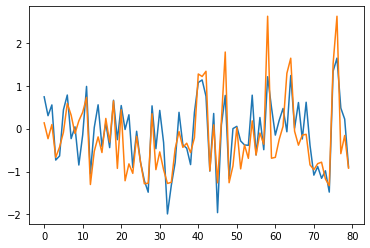

In [42]:
plt.plot(y_pred[10:90])
plt.plot(y_test[10:90])

In [44]:
y_predict = label_scaler.inverse_transform(y_pred)

In [45]:
y_test_no_encode = label_scaler.inverse_transform(y_test)

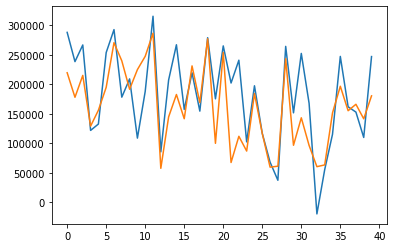

In [47]:
plt.plot(y_predict[10:50])
plt.plot(y_test_no_encode[10:50])